In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']

scalogram = ['up_bytes_1max_y', 'up_bytes_2max_y', 'up_bytes_3max_y', 'up_bytes_4max_y', 'up_bytes_5max_y',
    'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_3max_x', 'up_bytes_4max_x', 'up_bytes_5max_x',
    'up_bytes_1min_y', 'up_bytes_2min_y', 'up_bytes_3min_y', 'up_bytes_4min_y', 'up_bytes_5min_y',
    'up_bytes_1min_x', 'up_bytes_2min_x', 'up_bytes_3min_x', 'up_bytes_4min_x', 'up_bytes_5min_x',
    'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_3max_y', 'up_packet_4max_y', 'up_packet_5max_y',
    'up_packet_1max_x', 'up_packet_2max_x', 'up_packet_3max_x', 'up_packet_4max_x', 'up_packet_5max_x',
    'up_packet_1min_y', 'up_packet_2min_y', 'up_packet_2min_y', 'up_packet_4min_y', 'up_packet_5min_y',
    'up_packet_1min_x', 'up_packet_2min_x', 'up_packet_3min_x', 'up_packet_4min_x', 'up_packet_5min_x',
    'down_bytes_1max_y', 'down_bytes_2max_y', 'down_bytes_3max_y', 'down_bytes_4max_y', 'down_bytes_5max_y',
    'down_bytes_1max_x', 'down_bytes_2max_x', 'down_bytes_3max_x', 'down_bytes_4max_x', 'down_bytes_5max_x',
    'down_bytes_1min_y', 'down_bytes_2min_y', 'down_bytes_3min_y', 'down_bytes_4min_y', 'down_bytes_5min_y',
    'down_bytes_1min_x', 'down_bytes_2min_x', 'down_bytes_3min_x', 'down_bytes_4min_x', 'down_bytes_5min_x',
    'down_packet_1max_y', 'down_packet_2max_y', 'down_packet_3max_y', 'down_packet_4max_y', 'down_packet_5max_y',
    'down_packet_1max_x', 'down_packet_2max_x', 'down_packet_3max_x', 'down_packet_4max_x', 'down_packet_5max_x',
    'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_2min_y', 'down_packet_4min_y', 'down_packet_5min_y',
    'down_packet_1min_x', 'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x']

In [4]:

base_folder = "csv/30s0.10s/"

dataset = pd.DataFrame()

for path, subdirs, files in os.walk(base_folder):
    for name in files:
        data = pd.read_csv(os.path.join(str(path), str(name)))
        if(split_number(name)[0] == 'cap'):
            continue
        data['label'] = split_number(name)[0]
        dataset = pd.concat([dataset, data])
dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'], inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_2min_y', 'down_packet_3min_y', 'down_packet_4min_y',
       'down_packet_5min_y', 'down_packet_1min_x', 'down_packet_2min_x',
       'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x',
       'label'],
      dtype='object', length=133)
133


In [5]:
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh.csv', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn.csv', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn.csv', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn.csv', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn.csv', 'label'] = 'acestream'
dataset['label'].value_counts()

netflix      5731
youtube      4653
acestream    2514
twitch       2294
Name: label, dtype: int64

In [6]:
#Test some stuff
#dataset.drop(columns=silences, inplace=True)
dataset.columns
features = dataset.columns[:-1]
features

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_3min_y',
       'down_packet_4min_y', 'down_packet_5min_y', 'down_packet_1min_x',
       'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x',
       'down_packet_5min_x'],
      dtype='object', length=132)

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
labels

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
15162    2
15163    2
15164    2
15165    2
15166    2
15167    2
15168    2
15169    2
15170    2
15171    2
15172    2
15173    2
15174    2
15175    2
15176    2
15177    2
15178    2
15179    2
15180    2
15181    2
15182    2
15183    2
15184    2
15185    2
15186    2
15187    2
15188    2
15189    2
15190    2
15191    2
Name: label, Length: 15192, dtype: int64

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_bytes_silence_mean        0.434830
up_bytes_silence_mean          0.432630
up_bytes_shortest_silence      0.287114
up_packet_shortest_silence     0.287114
down_bytes_shortest_silence    0.282086
up_bytes_perc25                0.236005
up_bytes_median                0.197101
up_bytes_perc50                0.197101
up_packet_longest_silence      0.189311
up_bytes_longest_silence       0.189311
down_packet_perc25             0.184737
down_bytes_longest_silence     0.178033
down_bytes_perc25              0.176851
up_packet_perc25               0.159010
down_packet_median             0.136892
down_packet_perc50             0.136892
up_packet_perc50               0.132694
up_packet_median               0.132694
down_bytes_median              0.114756
down_bytes_perc50              0.114756
up_bytes_perc75                0.023395
up_packet_perc75               0.022153
up_bytes_silences              0.014750
up_packet_silences             0.014750


In [9]:
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

In [10]:
'''
from sklearn.preprocessing import normalize
# Normalize data
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())
dataset_normalized = normalize(dataset_no_label)
dataset = pd.DataFrame(dataset_normalized, columns=features)
'''

"\nfrom sklearn.preprocessing import normalize\n# Normalize data\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\n\n#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())\ndataset_normalized = normalize(dataset_no_label)\ndataset = pd.DataFrame(dataset_normalized, columns=features)\n"

In [11]:
#PCA
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels
'''

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=10)\nmain_components = pca.fit_transform(dataset)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n"

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [13]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)


In [14]:
x_train

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_1min_y,down_packet_2min_y,down_packet_3min_y,down_packet_4min_y,down_packet_5min_y,down_packet_1min_x,down_packet_2min_x,down_packet_3min_x,down_packet_4min_x,down_packet_5min_x
10200,-0.079130,-0.144257,3.386415e-01,1.146781e-01,5.189428,24.965753,-0.144257,-0.144257,-0.144257,-0.144257,...,0.005860,0.008896,0.008737,0.008919,-1.000000,12.539757,8.630086,6.800425,3.935542,-1.000000
13412,-0.107161,-0.306905,4.092421e-01,1.674791e-01,2.671848,6.338245,-0.306905,-0.306905,-0.092536,0.121833,...,0.013330,0.001572,-1.000000,-1.000000,-1.000000,11.561446,7.336032,-1.000000,-1.000000,-1.000000
14671,0.226701,-0.174761,9.336432e-01,8.716896e-01,0.789465,-0.249575,-0.601404,-0.174761,0.802801,1.218680,...,0.005574,0.001867,-1.000000,-1.000000,-1.000000,13.454343,4.604757,-1.000000,-1.000000,-1.000000
4073,-0.578880,-0.706428,2.063335e-01,4.257351e-02,1.247258,0.331092,-0.726231,-0.706428,-0.450378,-0.322992,...,0.003252,0.008237,0.003024,-1.000000,-1.000000,12.814342,8.963502,4.433474,-1.000000,-1.000000
12451,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
8074,1.446792,1.243354,1.704337e+00,2.904765e+00,1.428606,1.797063,0.027553,1.243354,2.139456,3.579851,...,0.005365,0.009584,0.005290,0.008255,0.008069,12.745137,8.354190,6.441961,4.199776,2.579672
6824,-0.172218,-0.185985,5.152611e-02,2.654940e-03,3.478627,10.112128,-0.185985,-0.185985,-0.185985,-0.185985,...,0.008514,0.011564,0.002802,-1.000000,-1.000000,12.337687,8.724062,3.809727,-1.000000,-1.000000
7387,-0.106012,-0.137634,9.486510e-02,8.999387e-03,2.666667,5.111111,-0.137634,-0.137634,-0.137634,-0.106012,...,0.008994,0.012208,-1.000000,-1.000000,-1.000000,12.337687,8.724062,-1.000000,-1.000000,-1.000000
2055,0.017239,-0.135179,5.482904e-01,3.006224e-01,3.517940,10.605252,-0.135179,-0.135179,-0.135179,-0.115549,...,0.007299,0.009431,-1.000000,-1.000000,-1.000000,12.337687,8.724062,-1.000000,-1.000000,-1.000000
11597,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [15]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=42)
y_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")
y_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")
y_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")
y_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_predict, cross_val_score\nimport matplotlib.pyplot as plt\n\nrandom_forest = RandomForestClassifier(random_state=42)\ny_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")\ny_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")\ny_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")\ny_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")\n'

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [17]:
'''
y_scores_forest_y = y_probas_forest_y[:, 1]
y_scores_forest_n = y_probas_forest_n[:, 1]
y_scores_forest_t = y_probas_forest_t[:, 1]

fpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)
fpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)
fpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)


plot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")
plot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")
plot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")
#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

plt.legend(loc="lower right")
plt.show()
#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
#accuracy = sum(cvs)/len(cvs)
#print("Accuracy: " + str(accuracy))
'''

'\ny_scores_forest_y = y_probas_forest_y[:, 1]\ny_scores_forest_n = y_probas_forest_n[:, 1]\ny_scores_forest_t = y_probas_forest_t[:, 1]\n\nfpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)\nfpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)\nfpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)\n#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)\n\n\nplot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")\nplot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")\nplot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")\n#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")\n\nplt.legend(loc="lower right")\nplt.show()\n#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring=\'accuracy\')\n#accuracy = sum(cvs)/len(cvs)\n#print("Accuracy: " + str(accuracy))\n'

In [18]:
'''
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
conf_mx
'''

'\nrandom_forest.fit(x_train, y_train)\npredictions = random_forest.predict(x_test)\nconf_mx = confusion_matrix(y_test, predictions)\nplt.matshow(conf_mx, cmap=plt.cm.gray)\nconf_mx\n'

In [19]:
#grid_search_acc = GridSearchCV(random_forest, params, cv=10, scoring='accuracy')
#grid_search_acc.fit(x_train, y_train)

In [20]:
#best = grid_search.best_estimator_

In [21]:
#best2 = grid_search_acc.best_estimator_

In [22]:
#sorted(zip(grid_search.best_estimator_.feature_importances_, basic_stats), reverse=True)

In [23]:
'''
# Final evaluation
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)
rf.fit(x_train, y_train)
print("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))
'''

'\n# Final evaluation\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9, max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)\nrf.fit(x_train, y_train)\nprint("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))\nprint("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))\n'

In [24]:
'''
crossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")
crossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))
'''

'\ncrossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")\ncrossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")\nprint("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))\n'

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

def do_test_forest(model):
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    '''
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [26]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    '''
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [27]:
def do_test_knn(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
[[ 435    0   17    0]
 [   0  922    3    0]
 [   1    1 1158    1]
 [   0    0    1  500]]

Accuracy train set: 0.9991771579033983
Accuracy test set: 0.9921026653504442
-----OvO Classifier Random Forest------
[[ 436    0   16    0]
 [   0  920    5    0]
 [   0    3 1158    0]
 [   0    0    0  501]]

Accuracy train set: 0.9992594421130585
Accuracy test set: 0.9921026653504442
----------SVM-----------
Multiclass: 
	CrossValScore: 0.8294267515517344
[[376   7  62   7]
 [ 17 747 160   1]
 [ 63 183 912   3]
 [  1   0   3 497]]

Accuracy train set: 0.9191969061137167
Accuracy test set: 0.8331688055281342
----------Knn-----------


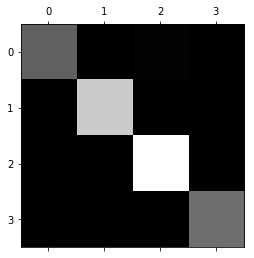

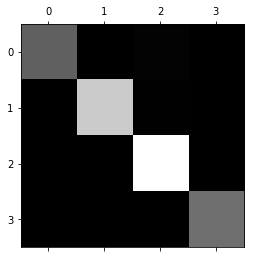

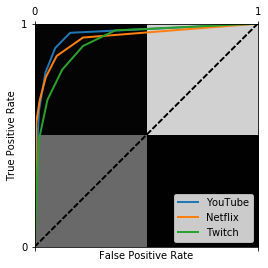

YouTube: 
	CrossValScore: 0.9253690736838722
	RocAucScore:  0.949505214116756
Netflix: 
	CrossValScore: 0.8915495426837428
	RocAucScore:  0.9345713885457394
Twitch: 
	CrossValScore: 0.8451434914446609
	RocAucScore:  0.9173747219321348
Multiclass: 
	CrossValScore: 0.8240823006185675
[[356  11  76   9]
 [ 50 716 157   2]
 [122 118 915   6]
 [  0   0   3 498]]

Accuracy train set: 0.8813461696700403
Accuracy test set: 0.8177031918394209
-----Neural Network-----


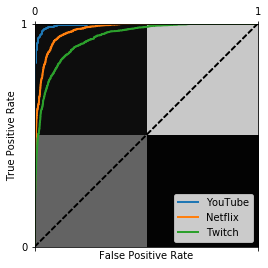

YouTube: 
	CrossValScore: 0.9775362083923529
	RocAucScore:  0.9932482002975644
Netflix: 
	CrossValScore: 0.9164020675461966
	RocAucScore:  0.9717317341857592
Twitch: 
	CrossValScore: 0.8801145901017977
	RocAucScore:  0.9364205779887119
Multiclass: 
	CrossValScore: 0.901265107129757
[[ 425    5   22    0]
 [  11  845   69    0]
 [  15   72 1074    0]
 [   1    0    0  500]]

Accuracy train set: 0.9563070846704518
Accuracy test set: 0.9358341559723593
--------AdaBoost Random Forest--------


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

do_test_forest(rf)


print("-----OvO Classifier Random Forest------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)
rf = OneVsOneClassifier(rf)
do_test_forest(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier()
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)






In [ ]:
'''
from sklearn.model_selection import GridSearchCV
params = dict()

random_forest = RandomForestClassifier()

params['forest'] = {
    'max_depth' : [6,7,8,9],
    'n_estimators': [30,100,300],
    'criterion': ['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 10],
}

grid_search = GridSearchCV(random_forest, params['forest'], cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_random_forest = grid_search.best_estimator_

predictions = best_random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(conf_mx)
print("\nAccuracy train set: " + str(sum(best_random_forest.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))
'''

In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

do_test_forest(rf)


-----Random Forest------


KeyboardInterrupt: 

In [30]:
# Save model

from sklearn.externals import joblib
joblib.dump(rf, '../models/rf_model_01s.sav') 


['../models/rf_model_01s.sav']

In [68]:
for path, subdirs, files in os.walk(base_folder):
    for name in files:
        if name == 'cap3.csv':
            test = pd.read_csv(os.path.join(str(path), str(name)))
test = test.drop(columns=['Unnamed: 0']).reset_index()
test.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence','label'], inplace=True)
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(test)
test = pd.DataFrame(imputer.transform(test), columns=test.columns)
print(rf.predict_log_proba(test))
print(rf.predict(test))

[[-0.65946734 -1.73477919 -1.2318347  -4.22145108]
 [-0.34487931 -4.11526472 -1.37651383 -3.77594527]
 [-0.16042623 -3.82198385 -2.0832087  -6.31718965]
 [-0.49440497 -2.76821807 -1.18112638 -3.8941985 ]
 [-0.13421028 -4.403363   -2.19051664 -6.50311376]
 [-0.30400206 -3.16321299 -1.53384557 -5.48550383]
 [-0.17031451 -4.36427963 -1.9777458  -5.20376361]
 [-0.1332101  -4.05725409 -2.246051   -6.43394457]
 [-0.10791961 -3.83569323 -2.52406313 -7.45159518]
 [-0.25609308 -3.09667795 -1.73380679 -5.49186039]
 [-0.06928215 -4.4673744  -2.91726127 -6.58740486]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
from sklearn.externals import joblib
rf = joblib.load('../models/rf_model_01s.sav')

In [47]:
print(prevlabel[4000])
dataset['label'][4000]


acestream


3

In [53]:
test

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_1min_y,down_packet_2min_y,down_packet_3min_y,down_packet_4min_y,down_packet_5min_y,down_packet_1min_x,down_packet_2min_x,down_packet_3min_x,down_packet_4min_x,down_packet_5min_x
0,-0.049954,-0.403884,0.903263,0.815885,0.936888,-0.152483,-0.777905,-0.403884,0.496817,1.335181,...,0.002346,0.001808,0.001815,-1.000000,-1.0,11.071279,3.978398,2.497202,-1.000000,-1.0
1,-0.555438,-1.038336,0.953788,0.909712,2.042770,3.353170,-1.076309,-1.038336,-0.688625,0.728165,...,0.015163,0.000547,-1.000000,-1.000000,-1.0,11.814609,6.727171,-1.000000,-1.000000,-1.0
2,-0.429697,-0.797330,1.049213,1.100848,1.963251,2.620611,-1.040970,-0.797330,-0.604283,1.413431,...,0.000837,0.002284,-1.000000,-1.000000,-1.0,10.262960,3.220981,-1.000000,-1.000000,-1.0
3,-0.290295,-0.852862,1.105632,1.222422,1.520949,1.379564,-1.076309,-0.852862,0.033406,1.490957,...,0.013611,0.002952,0.002953,-1.000000,-1.0,12.676306,7.336032,4.808627,-1.000000,-1.0
4,0.490188,0.728495,1.230044,1.513008,0.312373,-0.971798,-0.726433,0.728495,1.389561,1.860390,...,0.001233,0.004270,0.003137,-1.000000,-1.0,9.669475,4.087589,2.650473,-1.000000,-1.0
5,0.412808,0.602065,0.860344,0.740192,-0.417224,-1.152910,-0.262419,0.602065,1.011425,1.422233,...,0.008492,0.002504,0.000737,-1.000000,-1.0,13.237534,6.036658,2.524395,-1.000000,-1.0
6,0.350947,0.470368,0.871598,0.759682,0.216610,-0.865017,-0.559836,0.470368,0.849711,1.411894,...,0.003404,0.006488,0.001413,0.003516,-1.0,13.674702,7.140066,3.768688,2.538102,-1.0
7,-0.268645,-0.620746,1.062333,1.128552,1.905095,3.268406,-1.053646,-0.620746,-0.213910,1.118297,...,0.002405,0.002918,-1.000000,-1.000000,-1.0,7.660826,3.291511,-1.000000,-1.000000,-1.0
8,-0.061178,-0.247054,0.810107,0.656273,0.315406,-1.275492,-0.870641,-0.247054,0.627636,1.170910,...,0.006532,0.004598,0.000632,-1.000000,-1.0,9.988808,5.358670,2.497202,-1.000000,-1.0
9,0.236846,0.320672,0.891537,0.794837,-0.037296,-1.229062,-0.767698,0.320672,0.949033,1.227913,...,0.016661,0.001908,0.000587,-1.000000,-1.0,12.337687,6.949335,3.118009,-1.000000,-1.0
